<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lesson 18 - Clustering with Sklearn

---

In this notebook we'll practice clustering algorithms with Scikit-Learn.

## Data sets

We'll use the following datasets:
* Some sample data
* [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
* [Old Faithful eruption data](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat): eruption times and wait times between eruptions of a geyser in the Yellowstone National Park

There are many [clustering data sets](https://archive.ics.uci.edu/ml/datasets.html?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) you can use for practice!


In [1]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
# increase seaborn fonts
sns.set(font_scale=1.5)

from sklearn.cluster import KMeans, DBSCAN

## Create some synthetic data

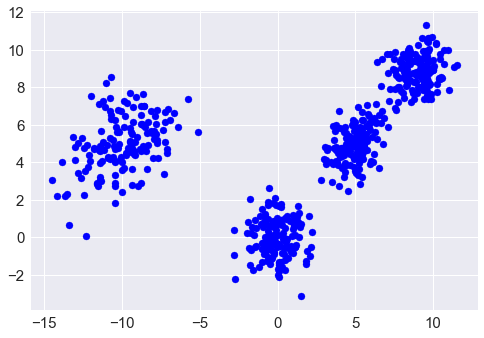

In [2]:
from scipy.stats import multivariate_normal

data = []

def create_data(data,num=150,mean=[0,0],cov=[[1,0],[0,1]]):
    dist = multivariate_normal(mean=mean, cov=cov)
    for i in range(num):
        data.append(dist.rvs())
    return data
        
data = []
data = create_data(data)
data = create_data(data,mean=[5,5], cov=[[1,0.5],[0.5,1]])
data = create_data(data,mean=[9,9], cov=[[1,0.2],[0.2,1]])
data = create_data(data,mean=[-10,5], cov=[[3,0.5],[0.5,2]])

df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'],c='b')
plt.show()

In [3]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `colour` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='b')
df_circ = pd.concat([df1, df2])

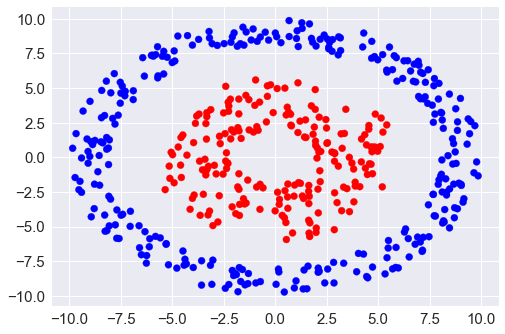

In [4]:
plt.scatter(df_circ['x'], df_circ['y'], c=df_circ['color'])
plt.show()

## K-Means with sklearn

In [5]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

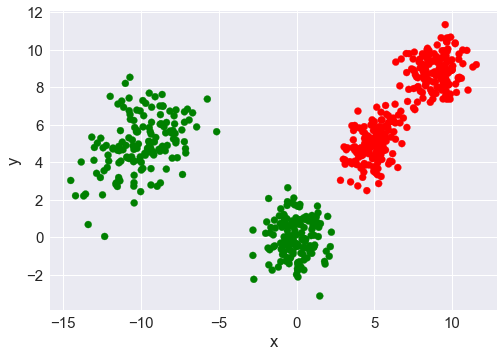

In [6]:
# Plot the data

def set_colors(labels, colors='rgbykcm'*10):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try it with `k=4` this time.

Counter({1: 151, 0: 150, 2: 150, 3: 149})


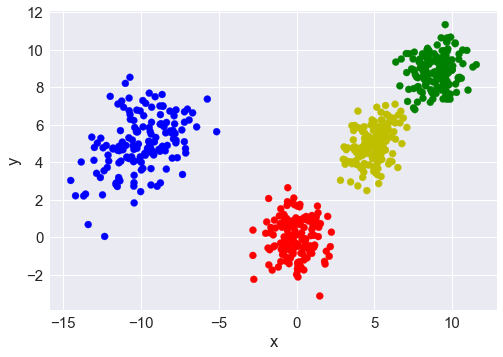

In [7]:
estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try the circular data.

Counter({1: 252, 0: 248})


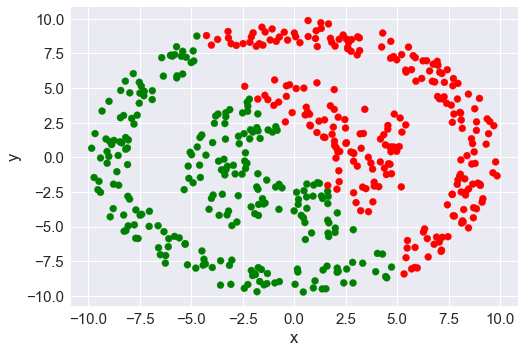

In [8]:
estimator = KMeans(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Not so great on this dataset. Now let's try some real data.

In [9]:
of_df = pd.read_csv("../datasets/old-faithful.csv")
of_df.head()

,eruption_time,wait_time
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


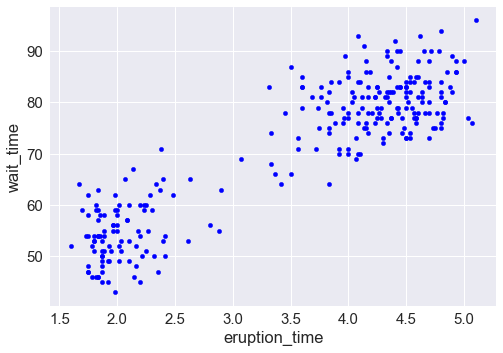

In [10]:
of_df.plot.scatter(x="eruption_time", y="wait_time",c='b')
plt.show()

Counter({1: 172, 0: 100})


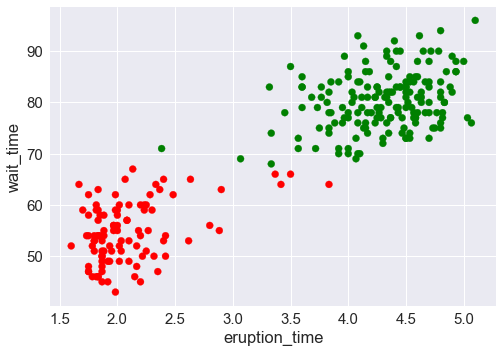

In [11]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = of_df[["eruption_time", "wait_time"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

# Plot the data

colors = set_colors(labels)
plt.scatter(of_df["eruption_time"], of_df["wait_time"], c=colors)
plt.xlabel("eruption_time")
plt.ylabel("wait_time")
plt.show()

## Exercise: k-means

For the Iris dataset, fit and plot k-means models to:
* sepal_length and petal_length, for k=2 and k=3
* sepal_width and petal_width, for k=2 and k=3

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

After: Check out the 3D-example [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

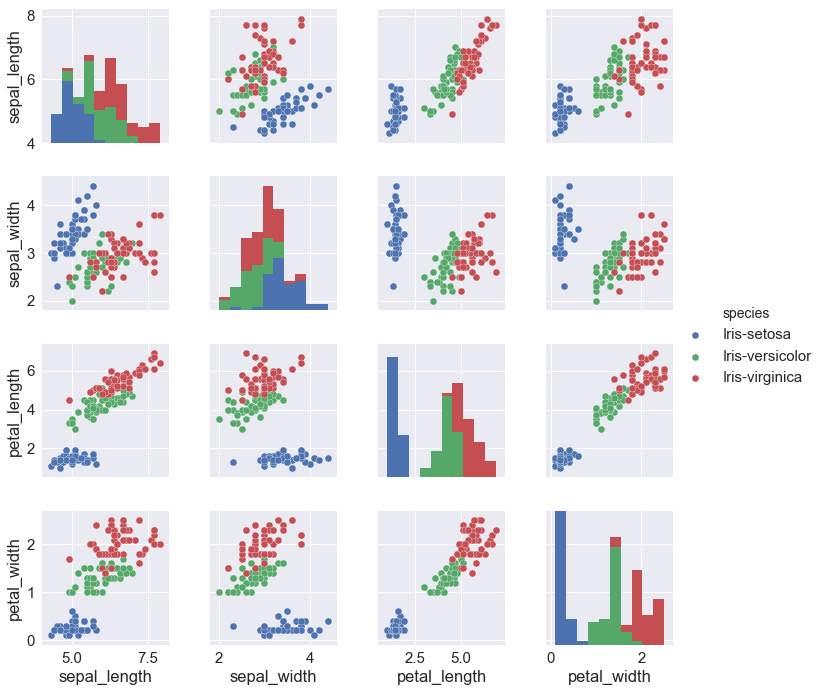

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
iris = pd.read_csv("../datasets/iris.data")

sns.pairplot(iris, hue="species")
plt.show()

iris.tail()

In [13]:
## Exercise Answers here




## DBSCAN

Counter({1: 149, 2: 147, 0: 141, 3: 119, -1: 44})


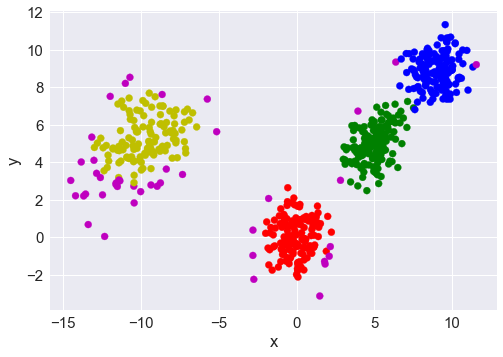

In [14]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.85, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({-1: 160, 2: 126, 0: 115, 3: 108, 7: 23, 9: 9, 1: 8, 8: 8, 4: 6, 6: 6, 10: 6, 5: 5, 11: 5, 12: 5, 13: 5, 14: 5})


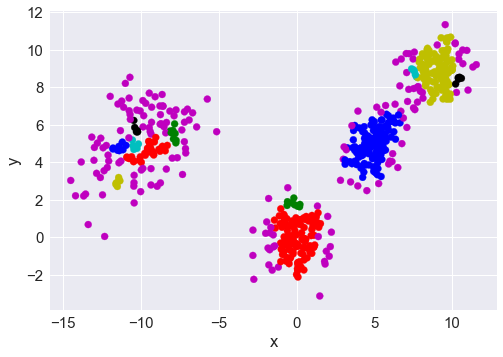

In [15]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.4, min_samples=5)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)

plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 300, 0: 200})


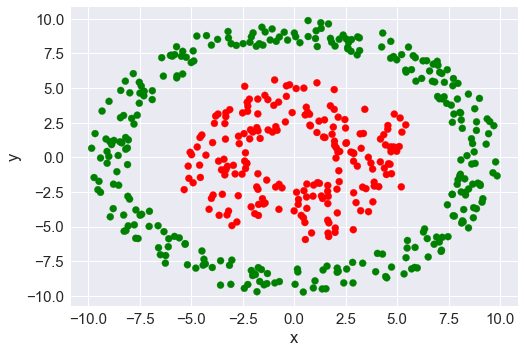

In [16]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Much better than k-means on this dataset! Let's try to cook up something that DBSCAN doesn't work as well on.

### Create some synthetic data

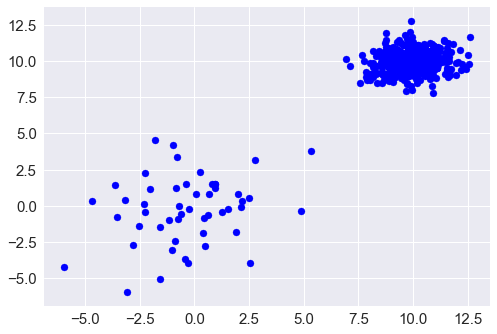

In [17]:
data = []
dist = multivariate_normal(mean=[0,0], cov=[[6,2],[2,6]])
for i in range(50):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[10,10], cov=[[1,0.1],[0.1,0.6]])
for i in range(400):
    data.append(dist.rvs())    
    
df2 = pd.DataFrame(data, columns=["x", "y"])
df2.head()
plt.scatter(df2['x'], df2['y'],c='b')
plt.show()

Counter({1: 400, 0: 40, -1: 10})


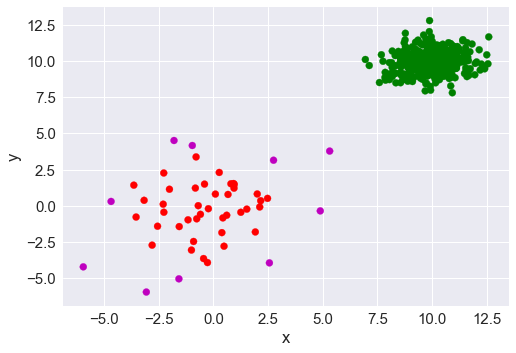

In [18]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 400, 0: 50})


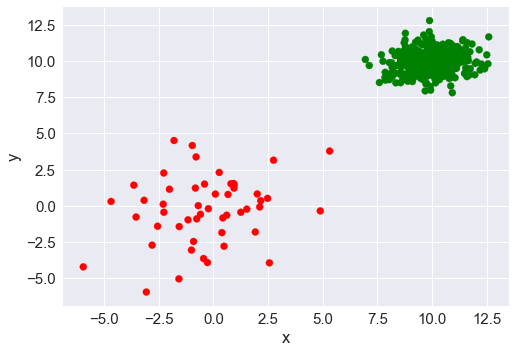

In [19]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=4, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise: DBSCAN

For the Iris dataset, fit and plot DBSCAN models to:
* sepal_length and petal_length
* sepal_width and petal_width

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

In [20]:
## Exercise Answers here


## Hierarchical Clustering

Counter({3: 151, 0: 150, 2: 150, 1: 149})


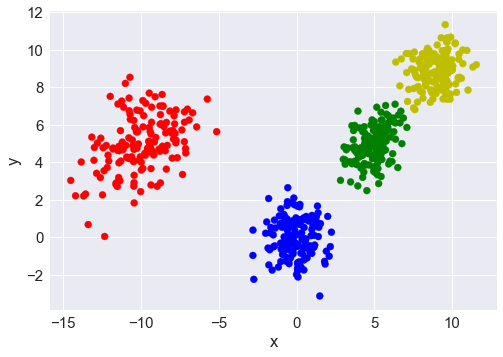

In [21]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({0: 312, 1: 188})


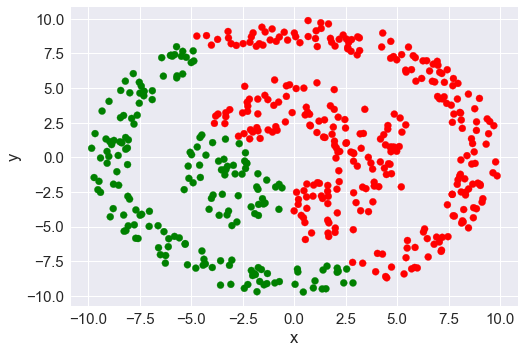

In [22]:
# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise: Hierarchical Clustering

For the Iris dataset, fit and plot hierarachical clustering models to:
* sepal_length and petal_length
* sepal_width and petal_width

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

In [23]:
## Your answer here


## Silhouette Coefficient

In [24]:
from sklearn import metrics

estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

print metrics.silhouette_score(X, labels, metric='euclidean')

Counter({3: 151, 0: 150, 2: 150, 1: 149})
0.714579462455


In [25]:
estimator = DBSCAN(eps=1.2, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)
print metrics.silhouette_score(X, labels, metric='euclidean')

Counter({1: 300, 0: 148, 2: 142, -1: 10})
0.627972099756


In [26]:
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

print metrics.silhouette_score(X, labels, metric='euclidean')

Counter({3: 151, 0: 150, 2: 150, 1: 149})
0.714579462455


For the silhouette coefficient, larger is better, so k-means was a better clustering algorithm on this data set with the given parameter choice.

## Exercise: Silhouette coefficients

Test k-means, DBSCAN and hierarchical clustering varying the model parameters on the iris dataset. Judge the quality of the models by their Silhouette coefficients. 

**Bonus:** Repeat the same on the remaining datasets used in this lab.

In [27]:
X = iris[["sepal_width", "petal_width"]]